In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import shap

In [2]:
data = pd.read_csv('Statistics.csv')
data.head(3)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [3]:
y = (data['Man of the Match']) # Strings to binary

In [4]:
features = [col for col in data.columns if data[col].dtype == np.int64]
features

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [5]:
X = data[features]
X.head(3)

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [7]:
model = RandomForestClassifier(random_state = 11).fit(X_train, y_train)

In [8]:
explainer = shap.TreeExplainer(model)

In [9]:
d_pred = X_valid.iloc[11]
d_pred

Goal Scored                 2
Ball Possession %          68
Attempts                   16
On-Target                   4
Off-Target                 11
Blocked                     1
Corners                     7
Offsides                    1
Free Kicks                 18
Saves                       1
Pass Accuracy %            91
Passes                    762
Distance Covered (Kms)    103
Fouls Committed             5
Yellow Card                 0
Yellow & Red                0
Red                         0
Goals in PSO                0
Name: 68, dtype: int64

In [10]:
d_pred.values

array([  2,  68,  16,   4,  11,   1,   7,   1,  18,   1,  91, 762, 103,
         5,   0,   0,   0,   0], dtype=int64)

In [11]:
d_pred = d_pred.values.reshape(1, -1)
d_pred

array([[  2,  68,  16,   4,  11,   1,   7,   1,  18,   1,  91, 762, 103,
          5,   0,   0,   0,   0]], dtype=int64)

In [12]:
model.predict_proba(d_pred)

array([[0.46, 0.54]])

In [13]:
model.predict(d_pred)

array(['Yes'], dtype=object)

In [14]:
shap_values = explainer.shap_values(d_pred)
shap_values

[array([[-5.22386174e-02,  8.72088939e-03, -4.71292522e-02,
         -1.52511583e-02,  4.45670177e-02, -1.51660178e-02,
         -1.06487818e-02,  5.56285610e-04, -3.87584325e-03,
          3.00542225e-04,  1.22335256e-02,  2.65517417e-02,
         -9.03838536e-03,  3.90201556e-02, -3.56301052e-03,
          2.45455789e-05, -1.10184334e-03, -5.30420832e-04]]),
 array([[ 5.22386174e-02, -8.72088939e-03,  4.71292522e-02,
          1.52511583e-02, -4.45670177e-02,  1.51660178e-02,
          1.06487818e-02, -5.56285610e-04,  3.87584325e-03,
         -3.00542225e-04, -1.22335256e-02, -2.65517417e-02,
          9.03838536e-03, -3.90201556e-02,  3.56301052e-03,
         -2.45455789e-05,  1.10184334e-03,  5.30420832e-04]])]

In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], d_pred)

ABove example used TreeExplainer
Other types exist: + DeepExplainer for DL models, + KernelExpl..> Works with all models(but gives approximations rather than exact SHAP values

In [16]:
k_explainer = shap.KernelExplainer(model.predict_proba, X_valid)

k_app = k_explainer.shap_values(d_pred)

shap.force_plot(k_explainer.expected_value[1], k_app[1], d_pred)

  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
d_pred = X_valid.iloc[19]
d_pred = d_pred.values.reshape(1, -1)

k_explainer = shap.KernelExplainer(model.predict_proba, X_valid)
k_shap_values = k_explainer.shap_values(d_pred)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], d_pred)

  0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
d_pred = X_valid.iloc[12]
d_pred = d_pred.values.reshape(1, -1)

k_explainer = shap.KernelExplainer(model.predict_proba, X_valid)
k_shap_values = k_explainer.shap_values(d_pred)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], d_pred)

  0%|          | 0/1 [00:00<?, ?it/s]

## Advanced uses of SHAP Values
Aggregate individual shap_v for more detailed model insights

In [19]:
# Calculate SHAP values for all validation data
shap_values = explainer.shap_values(X_valid)

In [23]:
shap_values

[array([[-2.64457343e-02,  3.61269522e-02,  5.33709249e-02,
          1.16718502e-02, -2.19736582e-02, -9.32077707e-03,
          4.19482333e-02, -8.40695656e-03, -5.00678406e-03,
         -7.54210981e-03, -4.48547844e-02, -3.20419400e-02,
          2.78296102e-02,  7.65452364e-04, -2.05895326e-03,
          7.85064423e-05, -7.55406999e-04,  4.69476083e-05],
        [-8.69035335e-02,  2.60790685e-02,  5.82609922e-02,
          2.83088330e-02,  4.59943071e-02, -2.75974124e-03,
          9.32170002e-03,  5.45878119e-03,  4.15882760e-03,
          2.89444551e-02,  3.85858396e-03,  2.40592823e-02,
         -2.80629545e-02, -7.21318347e-03, -5.92211487e-03,
          1.54945046e-04, -7.57133449e-04,  4.50257477e-04],
        [ 2.19776296e-01,  5.25242060e-04,  3.87379520e-02,
          5.57823783e-02,  5.09995612e-02,  1.54344316e-04,
          7.50907153e-03, -1.01241962e-02,  1.85652839e-02,
         -1.07641180e-03, -5.65116131e-02,  1.13286555e-02,
         -2.06145012e-02, -5.90162466e

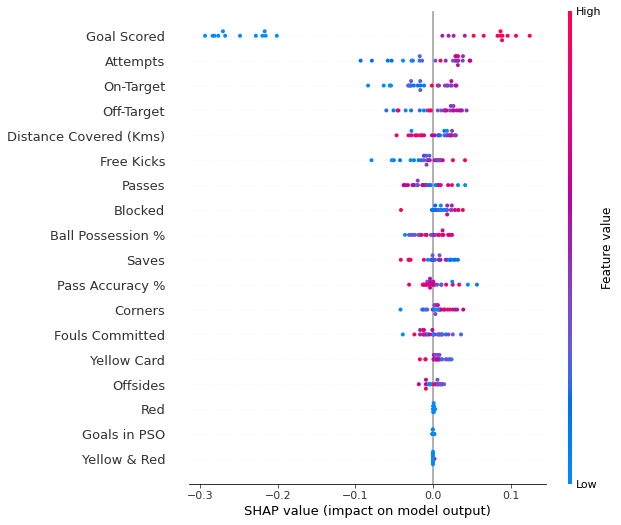

In [20]:
# Plot all values
shap.summary_plot(shap_values[1], X_valid)

## SHAP Dependence Plots

In [21]:
X_valid[:7]

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
70,1,32,8,2,5,1,1,1,12,3,69,226,93,16,2,0,0,0
115,2,43,8,3,3,2,4,0,15,9,83,370,105,16,2,0,0,0
72,0,38,5,1,2,2,4,1,11,4,72,305,106,10,1,0,0,0
117,2,57,12,2,4,6,6,1,12,3,80,525,110,7,1,0,0,0
31,2,43,8,2,4,2,3,3,11,3,81,328,107,15,2,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0


In [24]:
X_valid.loc[X_valid['Ball Possession %'] >= 50][:4]

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
117,2,57,12,2,4,6,6,1,12,3,80,525,110,7,1,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
18,0,60,25,9,9,7,8,1,17,3,88,595,110,10,2,0,0,0


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


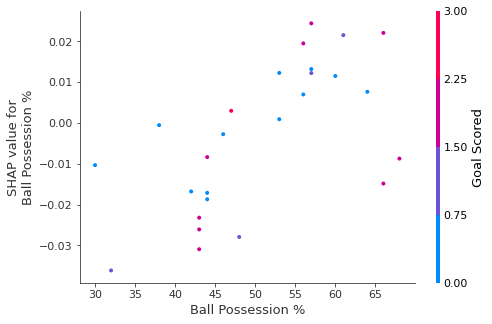

In [27]:
shap.dependence_plot('Ball Possession %', shap_values[1], X_valid, 
                     interaction_index = 'Goal Scored')

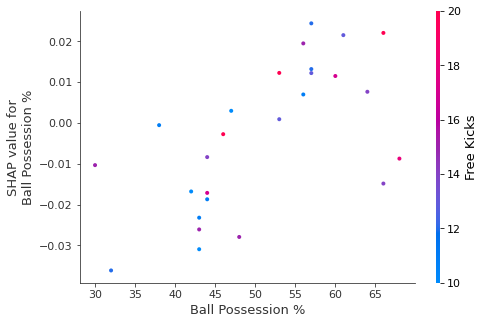

In [29]:
# If you leave out interaction index
# SHapLey uses some logic to pick one
shap.dependence_plot('Ball Possession %', shap_values[1], X_valid)

In [30]:
shap_values_all = explainer.shap_values(X)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


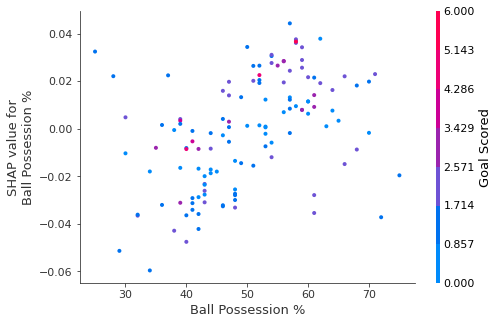

In [33]:
shap.dependence_plot('Ball Possession %', shap_values_all[1], X,
                    interaction_index = 'Goal Scored')